In [52]:
#importing the necessary Libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [53]:
#Loading the data

base_data_df=pd.read_csv("C:\\Users\\Raviraj Kuber\\Documents\\IIITB\\ML1\\Clustering+PCA Assignment\\Clustering+PCA Files\\Country-data.csv")
base_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [54]:
base_data_df.shape

(167, 10)

In [55]:
# Basic checks on data
base_data_df.country.value_counts()
base_data_df.info()
base_data_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Observations- All columns Non Null. No Need of Dropping any columns/rows**

In [56]:
## Adding ID  column before dropping country column
base_data_df["ID"]=base_data_df.index+1000

In [57]:
##  View Sample Data for Clustering
base_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1000
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1001
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1002
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1003
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1004


**Identifying Outliers**

In [58]:
base_data_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ID'],
      dtype='object')

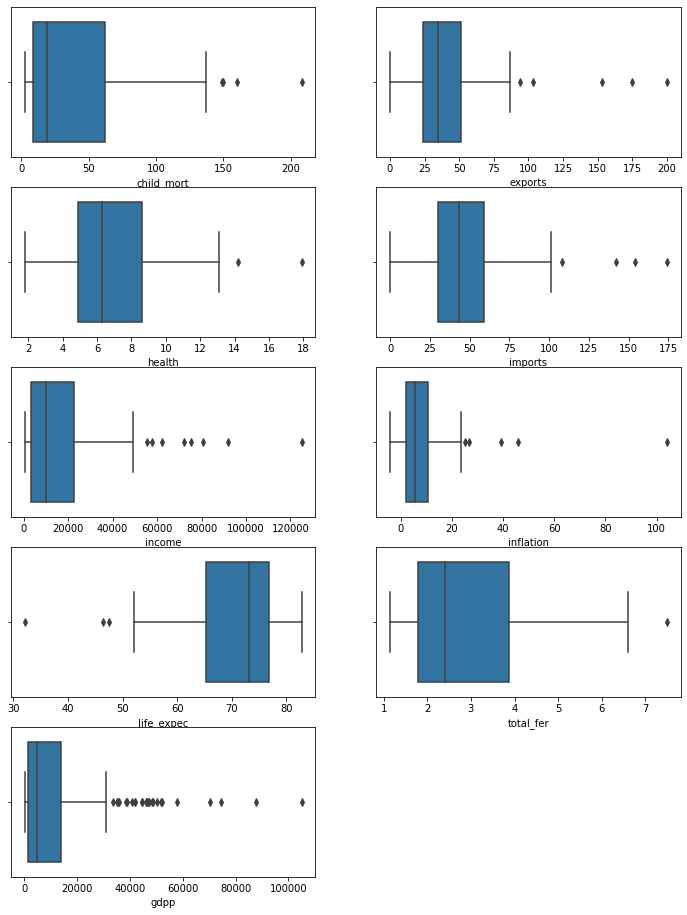

In [59]:
plt.figure(figsize = (12,16))
col_list=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']
for en in enumerate(col_list):
    plt.subplot(5,2,en[0]+1)
    sns.boxplot(x=en[1],data=base_data_df)

**Outlier Treatment Observation- From the above plots, the number of Outliers are considerably huge. Trying to Drop the Outliers before Clustering/PCA, may lead to loss of necessary infomation Also the outliers might form a different cluster altogether. Hence Not Dropping Outliers PCA**

**1. Applying PCA**

In [60]:
# Preserving ID column & then dropping
id=base_data_df["ID"]
base_data_df_new=base_data_df.drop('ID',axis=1)
base_data_df_new=base_data_df_new.drop('country',axis=1)
base_data_df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
#Scaling data
scaler = StandardScaler()
base_data_df_new2 =scaler.fit_transform(base_data_df_new)

In [62]:
#base_data_df_new2.max()
base_data_df_new2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [63]:
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(base_data_df_new2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [64]:
#IDentifying Value of Vectors Post PCA
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [65]:
# Identifying the Variance Ratio of Components Post PCA
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative Variance')

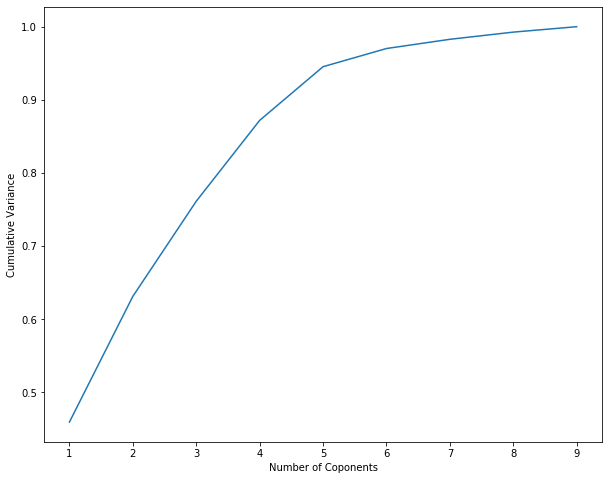

In [66]:
# Analyzing  the Scree Plot
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4,5,6,7,8,9], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

**From the Above Scree Plot & Variance Values, Majority of the Variance can be explained by First 4 components (about 86%). Hence Considering 4 as number of Principal components.**

In [67]:
## Implementing PCA using number of components=4 & Incremental PCA
pca_final = IncrementalPCA(n_components = 4)
df_pca = pca_final.fit_transform(base_data_df_new2)
df_pca.shape

(167, 4)

In [68]:
#Dataframe with only Principal Components
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [69]:
#View Principal Component Dataframe
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [70]:
# Adding the ID Column to Principal Component Dataframe
pca_df2 = pd.DataFrame({'ID': list(id), 'PC1': pc[0], 'PC2':pc[1],'PC3': pc[2],'PC4': pc[3]})
pca_df2.head()

,ID,PC1,PC2,PC3,PC4
0,1000,-2.913787,0.088354,0.721003,0.996699
1,1001,0.429358,-0.587859,0.321052,-1.171193
2,1002,-0.282988,-0.446657,-1.225135,-0.850127
3,1003,-2.930969,1.699437,-1.521734,0.875966
4,1004,1.031988,0.130488,0.192922,-0.844808


**2.Hopkins on Above Dataframe**

In [71]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [72]:
#Calculating Hopkins Value
hopkins(pca_df2.drop('ID', axis=1))
#Hopkins Value is Fluctuating between range of 79 & 87. Hence Clustering can be performed on the mentioned dataset.

0.8104973191151998

In [73]:
cluster_df=pca_df2.drop('ID', axis=1)
cluster_df.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


**K Means Clustering**

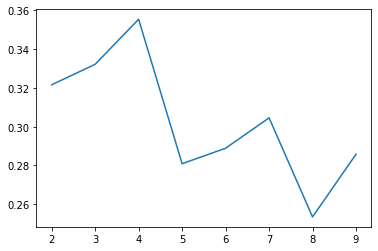

In [74]:
#Calculating Silhouette Score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(cluster_df)
    ss.append([k, silhouette_score(cluster_df, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

**Silhouette Score Drastically Drops Post n=4, hence clustering with n=4**

In [75]:
## Clustering using Kmeans,n=4
model_kmean = KMeans(n_clusters = 4, random_state = 50)
model_kmean.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [76]:
# Adding Cluster ID to Data
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['ID', 'PC1', 'PC2', 'PC3','PC4','ClusterID']
dat_km.head()

,ID,PC1,PC2,PC3,PC4,ClusterID
0,1000,-2.913787,0.088354,0.721003,0.996699,1
1,1001,0.429358,-0.587859,0.321052,-1.171193,2
2,1002,-0.282988,-0.446657,-1.225135,-0.850127,2
3,1003,-2.930969,1.699437,-1.521734,0.875966,1
4,1004,1.031988,0.130488,0.192922,-0.844808,2


**Cluster Analysis**

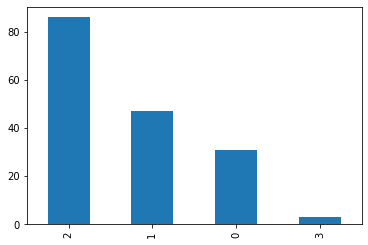

In [77]:
# No. of Observation Per Cluster
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')

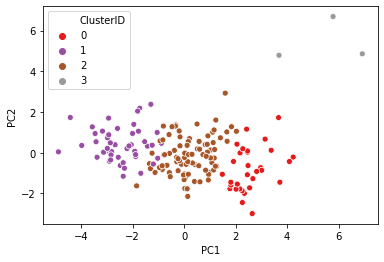

In [78]:
# Scatter Plots - PC1 & PC2
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')

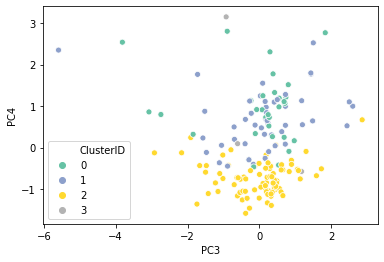

In [79]:
# Scatter Plots - PC3 & PC4
sns.scatterplot(x = 'PC3', y = 'PC4', hue = 'ClusterID', data = dat_km, palette='Set2')

In [80]:
# Merge clusterid with original data
km_clustered_df=pd.merge(base_data_df,dat_km[['ID', 'ClusterID']],on='ID')
km_clustered_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1000,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1001,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1002,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1003,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1004,2


In [81]:
km_clustered_df.drop('ID', axis =1).groupby('ClusterID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterID,,,,,,,,,
0,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.598837,41.003360,6.216744,47.865883,12790.348837,7.516291,72.882558,2.295581,6769.325581
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


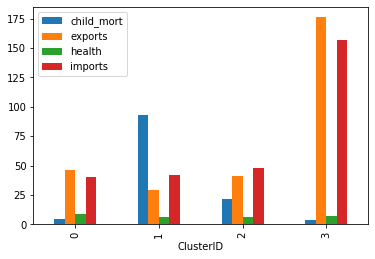

In [82]:
# Analyzing Cluster Details - 1
km_clustered_df[['child_mort', 'exports', 'health','imports', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

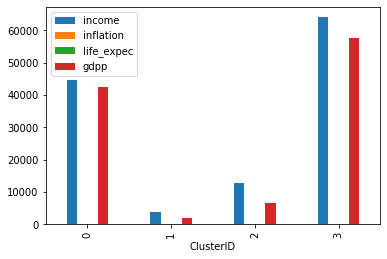

In [83]:
# Analyzing Cluster Details - 2
km_clustered_df[['income', 'inflation','life_expec', 'gdpp', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

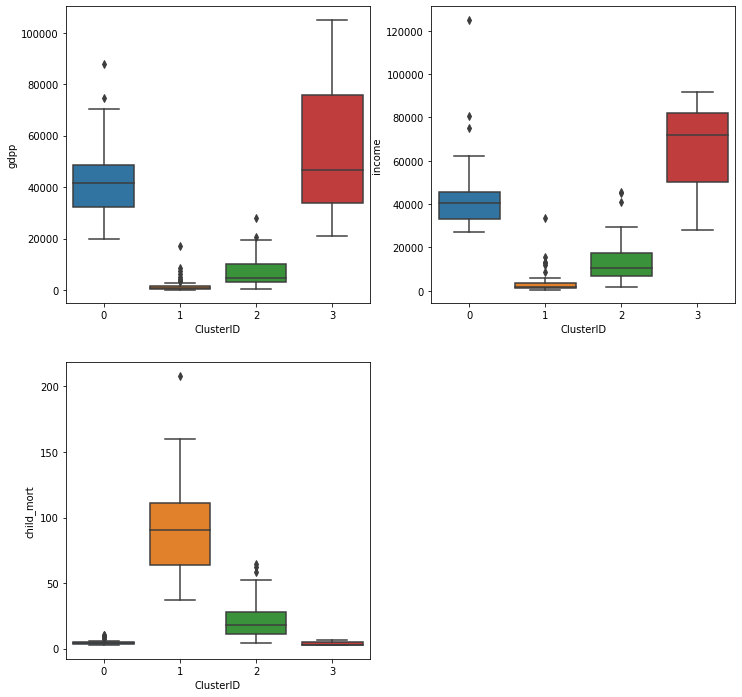

In [84]:
# Identifying Outliers Post PCA
plt.figure(figsize = (12,12))
var = ['gdpp', 'income','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = km_clustered_df)

**It was observed that the Outlier Behaviour Pre & Post PCA are almost identical. Since the Number of Outliers are large, we are considering not to Drop Any Outlier, as they contain Valuable information.**

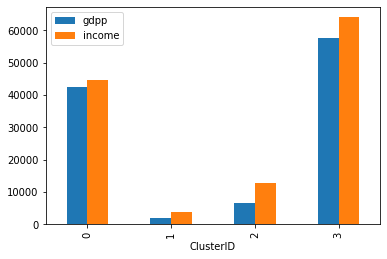

In [85]:
# Cluster Analysis for gdpp,income
km_clustered_df[['gdpp', 'income', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

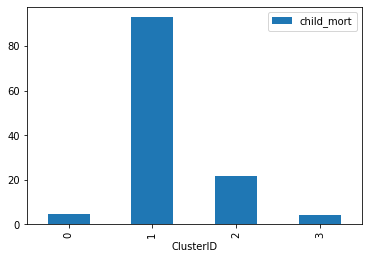

In [86]:
# Cluster Analysis for child_mort
km_clustered_df[['child_mort','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

**From the Above Charts, for GDP,Income & Child Mortality, it is seen that Countries in Cluster 1 have Low GDP & Income Rate & High rate of Child Mortality. Hence These are the countries that need to be taken in to consideration for HELP.**

In [87]:
#Identifying Countries in Cluster 1
print(km_clustered_df[['country', 'ClusterID']].groupby('ClusterID').count())

list1=km_clustered_df['ClusterID']==1
country_list=km_clustered_df[list1]

           country
ClusterID         
0               31
1               47
2               86
3                3


In [88]:
country_list[['country','child_mort' ,'ClusterID']].sort_values(by=['child_mort'],ascending=False). head()

,country,child_mort,ClusterID
66,Haiti,208.0,1
132,Sierra Leone,160.0,1
32,Chad,150.0,1
31,Central African Republic,149.0,1
97,Mali,137.0,1


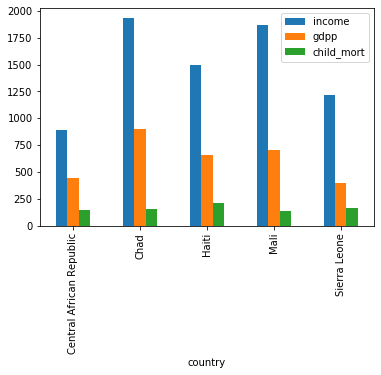

In [89]:
# Top 5 Countries with High Child Mortality
country_list[['country','income','gdpp','child_mort' ]].sort_values(by=['child_mort'],ascending=False). head().groupby('country').mean().plot(kind = 'bar')

**From the Above Analysis, using PCA & Kmeans Clustering, there are 47 countries in Cluster 1 that required AID.  By Sorting the countries based on Child Mortality, High to Low, above are the Top 5 Countries that require AID at the earliest**

**Hierarchical Clustering**

In [90]:
# For Hierarchical Clustering, the scaled dataframe was already available from Scaling done Above. Hence using the same.
base_data_df_new2 = pd.DataFrame(base_data_df_new2)
base_data_df_new2.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
base_data_df_new2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


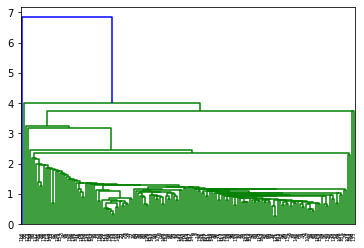

In [91]:
# single linkage
sl = linkage(base_data_df_new2, method="single", metric='euclidean')
dendrogram(sl)
plt.show()

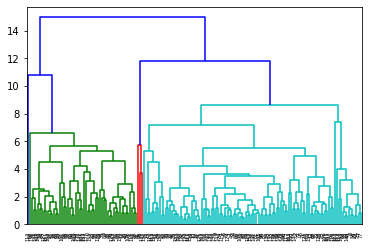

In [92]:
# complete linkage
cl = linkage(base_data_df_new2, method="complete", metric='euclidean')
dendrogram(cl)
plt.show()

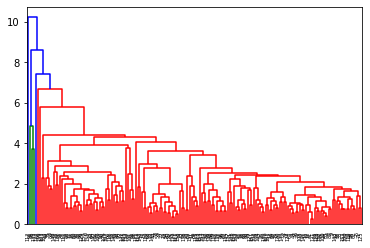

In [93]:
# average linkage
al = linkage(base_data_df_new2, method="average", metric='euclidean')
dendrogram(al)
plt.show()

**From Complete Linkage, considering maximum variance @80% ,we can have 4 Clusters. Hence Cutting the tree for 4 Clusters**

In [94]:
# 4 clusters
cluster_labels = cut_tree(cl, n_clusters=4).reshape(-1, )
cluster_labels
# Appending Cluster Labels of CL to Existing Dataframe
km_clustered_df['Cl_ClusterID']=cluster_labels
km_clustered_df.head()
km_clustered_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ID', 'ClusterID',
       'Cl_ClusterID'],
      dtype='object')

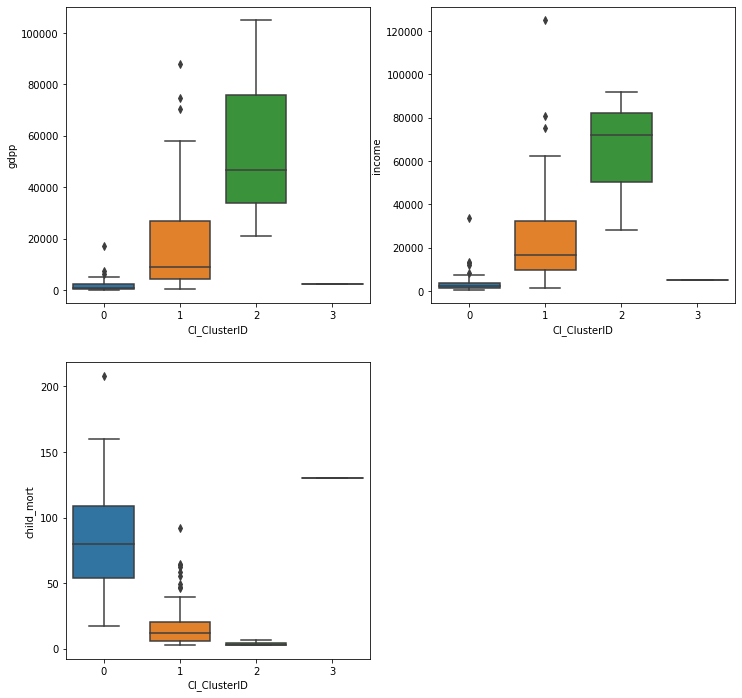

In [95]:
# Identifying Outliers Post PCA [For Hierarchical Clustering]
plt.figure(figsize = (12,12))
var = ['gdpp', 'income','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'Cl_ClusterID', y = i[1], data = km_clustered_df)

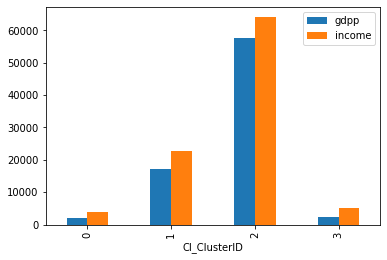

In [96]:
# Cluster Analysis for gdpp,income for Hierarchical Clustering
km_clustered_df[['gdpp', 'income', 'Cl_ClusterID']].groupby('Cl_ClusterID').mean().plot(kind = 'bar')

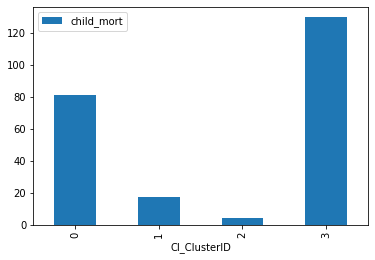

In [97]:
# Cluster Analysis for gdpp,income for Hierarchical Clustering
km_clustered_df[['child_mort', 'Cl_ClusterID']].groupby('Cl_ClusterID').mean().plot(kind = 'bar')

**From the Above Charts, for GDP,Income & Child Mortality, it is seen that Countries in Cluster 0 & Cluster 3 have Low GDP & Income Rate & High rate of Child Mortality. Hence These are the countries that need to be taken in to consideration for HELP.**

In [98]:
#Identifying Countries in Cluster 0
print(km_clustered_df[['country', 'Cl_ClusterID']].groupby('Cl_ClusterID').count())

list2=km_clustered_df['Cl_ClusterID']==0
country_list=km_clustered_df[list2]

              country
Cl_ClusterID         
0                  54
1                 109
2                   3
3                   1


In [99]:
country_list[['country','child_mort' ,'Cl_ClusterID']].sort_values(by=['child_mort'],ascending=False). head()

,country,child_mort,Cl_ClusterID
66,Haiti,208.0,0
132,Sierra Leone,160.0,0
32,Chad,150.0,0
31,Central African Republic,149.0,0
97,Mali,137.0,0


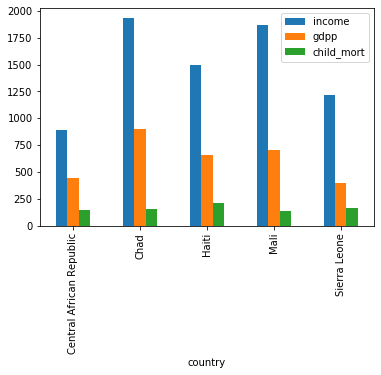

In [100]:
# Top 5 Countries with High Child Mortality
country_list[['country','income','gdpp','child_mort' ]].sort_values(by=['child_mort'],ascending=False). head().groupby('country').mean().plot(kind = 'bar')

In [101]:
#Identifying Countries in Cluster 3
list2=km_clustered_df['Cl_ClusterID']==3
country_list=km_clustered_df[list2]
country_list[['country','child_mort' ,'Cl_ClusterID']].sort_values(by=['child_mort'],ascending=False). head()

,country,child_mort,Cl_ClusterID
113,Nigeria,130.0,3


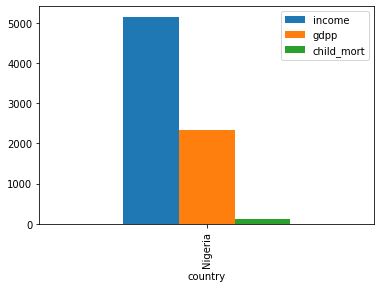

In [102]:
# Top 5 Countries with High Child Mortality
country_list[['country','income','gdpp','child_mort' ]].sort_values(by=['child_mort'],ascending=False). head().groupby('country').mean().plot(kind = 'bar')

**From the Above Analysis, using PCA & Hierarchical Clustering, there are 54 countries in Cluster 0  that required AID.  By Sorting the countries based on Child Mortality, High to Low, above are the Top 5 Countries that require AID at the earliest**

    Considering Both K-Means Clustering & Hierarchical Clustering, following are the Top 5 Countries that Require urgent Aid
    1) Haiti
    2) Sierra Leone
    3) Chad
    4) Central African Republic
    5) Mali